In [31]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
movies = pd.read_csv('movielens/movies.dat', sep='::', names=['movie_id', 'title', 'genres'])
movies

<ipython-input-3-02f348b8c446>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  movies = pd.read_csv('movielens/movies.dat', sep='::', names=['movie_id', 'title', 'genres'])


,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama


In [5]:
users = pd.read_csv('movielens/users.dat', sep='::', names=['user_id', 'gender', 'age', 'occupation', 'zipcode'])
users

<ipython-input-5-78be4daa9a77>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  users = pd.read_csv('movielens/users.dat', sep='::', names=['user_id', 'gender', 'age', 'occupation', 'zipcode'])


,user_id,gender,age,occupation,zipcode
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455
...,...,...,...,...,...
6035,6036,F,25,15,32603
6036,6037,F,45,1,76006
6037,6038,F,56,1,14706
6038,6039,F,45,0,01060


In [7]:
ratings = pd.read_csv('movielens/ratings.dat', sep='::', names=['user_id', 'movie_id', 'ratings', 'timestamp'])
ratings

<ipython-input-7-48c494bd8f06>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  ratings = pd.read_csv('movielens/ratings.dat', sep='::', names=['user_id', 'movie_id', 'ratings', 'timestamp'])


,user_id,movie_id,ratings,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


In [9]:
data = pd.merge(pd.merge(ratings, users), movies)
data

,user_id,movie_id,ratings,timestamp,gender,age,occupation,zipcode,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama
...,...,...,...,...,...,...,...,...,...,...
1000204,5949,2198,5,958846401,M,18,17,47901,Modulations (1998),Documentary
1000205,5675,2703,3,976029116,M,35,14,30030,Broken Vessels (1998),Drama
1000206,5780,2845,1,958153068,M,18,17,92886,White Boys (1999),Drama
1000207,5851,3607,5,957756608,F,18,20,55410,One Little Indian (1973),Comedy|Drama|Western


In [15]:
s1 = data['title']
s2 = s1.value_counts()
s2

American Beauty (1999)                                   3428
Star Wars: Episode IV - A New Hope (1977)                2991
Star Wars: Episode V - The Empire Strikes Back (1980)    2990
Star Wars: Episode VI - Return of the Jedi (1983)        2883
Jurassic Park (1993)                                     2672
                                                         ... 
Tinseltown (1998)                                           1
Scorta, La (1993)                                           1
Fantastic Night, The (La Nuit Fantastique) (1949)           1
Song of Freedom (1936)                                      1
Open Season (1996)                                          1
Name: title, Length: 3706, dtype: int64

In [17]:
s3 = s2[s2 > 500]
popular_films = s3.index
popular_films

Index(['American Beauty (1999)', 'Star Wars: Episode IV - A New Hope (1977)',
       'Star Wars: Episode V - The Empire Strikes Back (1980)',
       'Star Wars: Episode VI - Return of the Jedi (1983)',
       'Jurassic Park (1993)', 'Saving Private Ryan (1998)',
       'Terminator 2: Judgment Day (1991)', 'Matrix, The (1999)',
       'Back to the Future (1985)', 'Silence of the Lambs, The (1991)',
       ...
       'Ordinary People (1980)', 'Ice Storm, The (1997)',
       'Peggy Sue Got Married (1986)', 'Halloween (1978)', '28 Days (2000)',
       'Alien Nation (1988)', 'Body Heat (1981)',
       'Guns of Navarone, The (1961)', 'Emma (1996)',
       'Postino, Il (The Postman) (1994)'],
      dtype='object', length=617)

In [18]:
# top 10 films that were just loved by females
d1 = data[['title', 'gender', 'ratings']]
d1

,title,gender,ratings
0,One Flew Over the Cuckoo's Nest (1975),F,5
1,One Flew Over the Cuckoo's Nest (1975),M,5
2,One Flew Over the Cuckoo's Nest (1975),M,4
3,One Flew Over the Cuckoo's Nest (1975),M,4
4,One Flew Over the Cuckoo's Nest (1975),M,5
...,...,...,...
1000204,Modulations (1998),M,5
1000205,Broken Vessels (1998),M,3
1000206,White Boys (1999),M,1
1000207,One Little Indian (1973),F,5


In [19]:
d2 = d1.pivot_table('ratings', aggfunc='mean', index='title', columns='gender')
d2

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024
...,...,...
"Zed & Two Noughts, A (1985)",3.500000,3.380952
Zero Effect (1998),3.864407,3.723140
Zero Kelvin (Kj�rlighetens kj�tere) (1995),NaN,3.500000


In [20]:
d3 = d2.loc[popular_films]
d3

gender,F,M
American Beauty (1999),4.238901,4.347301
Star Wars: Episode IV - A New Hope (1977),4.302937,4.495307
Star Wars: Episode V - The Empire Strikes Back (1980),4.106481,4.344577
Star Wars: Episode VI - Return of the Jedi (1983),3.865237,4.069058
Jurassic Park (1993),3.579407,3.814197
...,...,...
Alien Nation (1988),3.433333,3.195946
Body Heat (1981),3.943925,4.055416
"Guns of Navarone, The (1961)",4.061224,3.953642
Emma (1996),4.061151,3.654709


In [21]:
d3.sort_values(by='F', ascending=False).head(10)

gender,F,M
"Close Shave, A (1995)",4.644444,4.473795
"Wrong Trousers, The (1993)",4.588235,4.478261
Schindler's List (1993),4.562602,4.491415
"Shawshank Redemption, The (1994)",4.539075,4.560625
To Kill a Mockingbird (1962),4.536667,4.372611
"Usual Suspects, The (1995)",4.513317,4.518248
Rear Window (1954),4.484536,4.472991
Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954),4.481132,4.576628
"Sixth Sense, The (1999)",4.477410,4.379944
Some Like It Hot (1959),4.462745,4.228769


In [22]:
d3.sort_values(by='M', ascending=False).head(10)

gender,F,M
"Godfather, The (1972)",4.314700,4.583333
Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954),4.481132,4.576628
"Shawshank Redemption, The (1994)",4.539075,4.560625
Raiders of the Lost Ark (1981),4.332168,4.520597
"Usual Suspects, The (1995)",4.513317,4.518248
Star Wars: Episode IV - A New Hope (1977),4.302937,4.495307
Schindler's List (1993),4.562602,4.491415
"Wrong Trousers, The (1993)",4.588235,4.478261
"Close Shave, A (1995)",4.644444,4.473795
Rear Window (1954),4.484536,4.472991


In [23]:
# top 10 films that had the maximum diagreement factor between males and females
d3

gender,F,M
American Beauty (1999),4.238901,4.347301
Star Wars: Episode IV - A New Hope (1977),4.302937,4.495307
Star Wars: Episode V - The Empire Strikes Back (1980),4.106481,4.344577
Star Wars: Episode VI - Return of the Jedi (1983),3.865237,4.069058
Jurassic Park (1993),3.579407,3.814197
...,...,...
Alien Nation (1988),3.433333,3.195946
Body Heat (1981),3.943925,4.055416
"Guns of Navarone, The (1961)",4.061224,3.953642
Emma (1996),4.061151,3.654709


In [30]:
d3['diff'] = d3['F'] - d3['M']
d3['diff'] = d3['diff'].abs()
d3.head(3)

gender,F,M,diff
American Beauty (1999),4.238901,4.347301,0.108400
Star Wars: Episode IV - A New Hope (1977),4.302937,4.495307,0.192371
Star Wars: Episode V - The Empire Strikes Back (1980),4.106481,4.344577,0.238096


In [27]:
d4 = d3.sort_values(by='diff', ascending=False).head(10)

gender,F,M,diff
Dirty Dancing (1987),3.790378,2.959596,0.830782
"Good, The Bad and The Ugly, The (1966)",3.494949,4.221300,0.726351
Dumb & Dumber (1994),2.697987,3.336595,0.638608
Evil Dead II (Dead By Dawn) (1987),3.297297,3.909283,0.611985
Grease (1978),3.975265,3.367041,0.608224
Caddyshack (1980),3.396135,3.969737,0.573602
Animal House (1978),3.628906,4.167192,0.538286
"Exorcist, The (1973)",3.537634,4.067239,0.529605
"Rocky Horror Picture Show, The (1975)",3.673016,3.160131,0.512885
Big Trouble in Little China (1986),2.987952,3.485030,0.497078


In [28]:
d5 = d4.drop(columns=['F', 'M'])
d5

gender,diff
Dirty Dancing (1987),0.830782
"Good, The Bad and The Ugly, The (1966)",0.726351
Dumb & Dumber (1994),0.638608
Evil Dead II (Dead By Dawn) (1987),0.611985
Grease (1978),0.608224
Caddyshack (1980),0.573602
Animal House (1978),0.538286
"Exorcist, The (1973)",0.529605
"Rocky Horror Picture Show, The (1975)",0.512885
Big Trouble in Little China (1986),0.497078


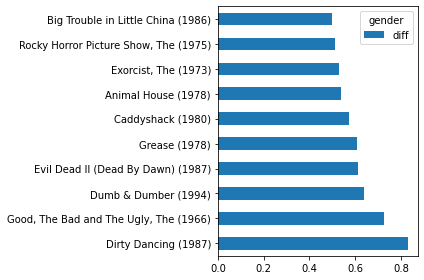

In [35]:
d5.plot(kind='barh')
plt.tight_layout()
plt.savefig('disagreement.pdf', format='pdf')